HW01
<br>
<br>
Di Tong

In [53]:
# import packages
from keras.datasets import fashion_mnist
from keras import models, layers, regularizers
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import numpy as np
import statistics 
import matplotlib.pyplot as plt

In [4]:
#1. Set your random seed to 1234
random.seed(1234)

In [5]:
# 2. Load the Fashion-MNIST dataset

# Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Randomly split the training data into 50,000 training observations and 10,000 validation observations
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, train_size = 50000, random_state = 1234)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# 3. Implement a series of neural network models

#i. Initial test
network_init = models.Sequential()
network_init.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(10, activation='softmax'))

network_init.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
init_result = network_init.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(val_x, val_y), verbose =0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


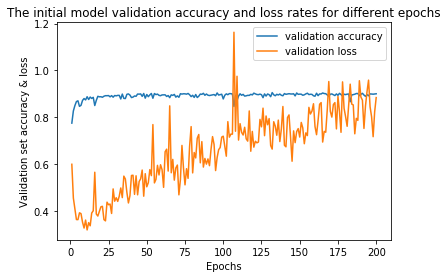

In [7]:
# Plot the validation set accuracy and loss over the epochs
init_val_acc = init_result.history['val_acc']
init_val_loss = init_result.history['val_loss']
epochs = np.arange(1, 201)

plt.plot(epochs, init_val_acc, label='validation accuracy')
plt.plot(epochs, init_val_loss, label='validation loss')
plt.ylabel('Validation set accuracy & loss')
plt.xlabel('Epochs')
plt.title('The initial model validation accuracy and loss rates for different epochs')
plt.legend()
plt.show()

Judging from the validation loss score, it seems that since around the epoch 10 the model's performance starts to degrade. As for the validation accuracy, it seems that since around th epich 7 the model's performance stops to get significantly better and remains at the same level as the epoch number increases to 200.
<br>
<br>

In [9]:
# ii. implement dropout
dropout = models.Sequential()
dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(10, activation='softmax'))
dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = dropout.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(val_x, val_y), verbose =0)

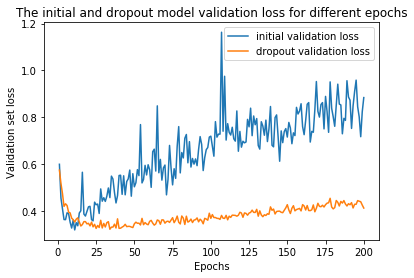

In [10]:
# graphically compare the validation loss across epochs to the initial model
drop_val_loss = result_dropout.history['val_loss']
plt.plot(epochs, init_val_loss, label='initial validation loss')
plt.plot(epochs, drop_val_loss, label='dropout validation loss')
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('The initial and dropout model validation loss for different epochs')
plt.show()

Comparing the validation loss of the two models, this new model has slightly larger validation loss than the old model before around epoch 15, hence it performs worse than the old model ; after epoch 15, the new dropout model has significantly lower validation loss than the initial model, therefore it performs better than the initial model.
<br>
<br>

In [12]:
# iii. Weight regularization

# Reestimate the initial model with L1 weight regularization on each layer 
l1_wr = models.Sequential()
l1_wr.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
l1_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_wr.add(layers.Dense(10, activation='softmax'))
l1_wr.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = l1_wr.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(val_x, val_y), verbose =0)

In [13]:
# Reestimate the initial model with L2 weight regularization on each layer 
l2_wr = models.Sequential()
l2_wr.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
l2_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_wr.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_wr.add(layers.Dense(10, activation='softmax'))
l2_wr.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = l2_wr.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(val_x, val_y), verbose =0)

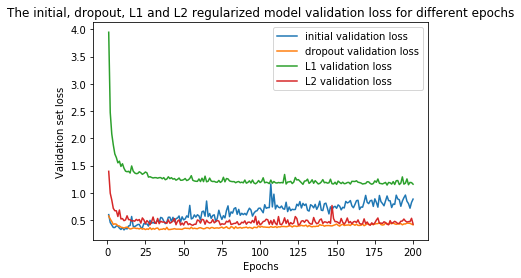

In [14]:
# Plot the validation loss for the initial model vs. the dropout
# vs. the L1 regularized model vs. the L2 regularized model
l1_val_loss = result_l1.history['val_loss']
l2_val_loss = result_l2.history['val_loss']
plt.plot(epochs, init_val_loss, label='initial validation loss')
plt.plot(epochs, drop_val_loss, label='dropout validation loss')
plt.plot(epochs, l1_val_loss, label='L1 validation loss')
plt.plot(epochs, l2_val_loss, label='L2 validation loss')
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('The initial, dropout, L1 and L2 regularized model validation loss for different epochs')
plt.show()

Comparing the validation loss for the four models, the dropout model performs quite consistenly the best over all epoches, as its validation liss is the lowest among the four for most epoches.
<br>
<br>

In [27]:
# iv. Evaluate a minimum of 10 alternative models, using different hyperparameter options 

# Model 1: 4 layer, 512 units, 512 batch size, 50 epochs, 0.01 l1 regularized
m1 = models.Sequential()
m1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.01)))
m1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
m1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
m1.add(layers.Dense(10, activation='softmax'))
m1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m1 = m1.fit(train_x, train_y, epochs=50, batch_size=512, validation_data=(val_x, val_y), verbose =0)

In [28]:
# Model 2: 3 layer, 512 units, 512 batch size, 100 epochs, 0.01 l2 regularized
m2 = models.Sequential()
m2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.01)))
m2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
m2.add(layers.Dense(10, activation='softmax'))
m2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m2 = m2.fit(train_x, train_y, epochs=100, batch_size=512, validation_data=(val_x, val_y), verbose =0)

In [17]:
# Model 3: 5 layer, 256 units, 256 batch size, 50 epochs, 0.1 dropout rate
m3 = models.Sequential()
m3.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
m3.add(layers.Dropout(0.1))
m3.add(layers.Dense(256, activation='relu'))
m3.add(layers.Dropout(0.1))
m3.add(layers.Dense(256, activation='relu'))
m3.add(layers.Dropout(0.1))
m3.add(layers.Dense(256, activation='relu'))
m3.add(layers.Dropout(0.1))
m3.add(layers.Dense(10, activation='softmax'))
m3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m3 = m3.fit(train_x, train_y, epochs=50, batch_size=256, validation_data=(val_x, val_y), verbose =0)

In [18]:
# Model 4: 6 layer, 256 units, 256 batch size, 100 epochs, 0.1 dropout rate
m4 = models.Sequential()
m4.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
m4.add(layers.Dropout(0.1))
m4.add(layers.Dense(256, activation='relu'))
m4.add(layers.Dropout(0.1))
m4.add(layers.Dense(256, activation='relu'))
m4.add(layers.Dropout(0.1))
m4.add(layers.Dense(256, activation='relu'))
m4.add(layers.Dropout(0.1))
m4.add(layers.Dense(256, activation='relu'))
m4.add(layers.Dropout(0.1))
m4.add(layers.Dense(10, activation='softmax'))
m4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m4 = m4.fit(train_x, train_y, epochs=100, batch_size=256, validation_data=(val_x, val_y), verbose =0)

In [19]:
# Model 5: 5 layer, 256 units, 256 batch size, 100 epochs, 0.05 l1 regularized
m5 = models.Sequential()
m5.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.05)))
m5.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.05)))
m5.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.05)))
m5.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.05)))
m5.add(layers.Dense(10, activation='softmax'))
m5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m5 = m5.fit(train_x, train_y, epochs=100, batch_size=256, validation_data=(val_x, val_y), verbose =0)

In [20]:
# Model 6: 4 layer, 128 units, 128 batch size, 150 epochs, 0.05 l2 regularized
m6 = models.Sequential()
m6.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.05)))
m6.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
m6.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
m6.add(layers.Dense(10, activation='softmax'))
m6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m6 = m6.fit(train_x, train_y, epochs=150, batch_size=128, validation_data=(val_x, val_y), verbose =0)

In [21]:
# Model 7: 4 layer, 128 units, 128 batch size, 150 epochs, 0.3 dropout rate
m7 = models.Sequential()
m7.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
m7.add(layers.Dropout(0.3))
m7.add(layers.Dense(128, activation='relu'))
m7.add(layers.Dropout(0.3))
m7.add(layers.Dense(128, activation='relu'))
m7.add(layers.Dropout(0.3))
m7.add(layers.Dense(10, activation='softmax'))
m7.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m7 = m7.fit(train_x, train_y, epochs=150, batch_size=128, validation_data=(val_x, val_y), verbose =0)

In [35]:
# Model 8: 3 layer, 128 units, 128 batch size, 100 epochs, 0.9 dropout rate
m8 = models.Sequential()
m8.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
m8.add(layers.Dropout(0.3))
m8.add(layers.Dense(128, activation='relu'))
m8.add(layers.Dropout(0.3))
m8.add(layers.Dense(10, activation='softmax'))
m8.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m8 = m8.fit(train_x, train_y, epochs=200, batch_size=128, validation_data=(val_x, val_y), verbose =0)

In [23]:
# Model 9: 3 layer, 512 units, 512 batch size, 50 epochs, 0.005 l1 regularized
m9 = models.Sequential()
m9.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.005)))
m9.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.005)))
m9.add(layers.Dense(10, activation='softmax'))
m9.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m9 = m9.fit(train_x, train_y, epochs=50, batch_size=512, validation_data=(val_x, val_y), verbose =0)

In [24]:
# Model 10: 6 layer, 128 units, 128 batch size, 50 epochs, 0.005 l2 regularized
m10 = models.Sequential()
m10.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.005)))
m10.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
m10.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
m10.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
m10.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
m10.add(layers.Dense(10, activation='softmax'))
m10.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m10 = m10.fit(train_x, train_y, epochs=50, batch_size=128, validation_data=(val_x, val_y), verbose =0)

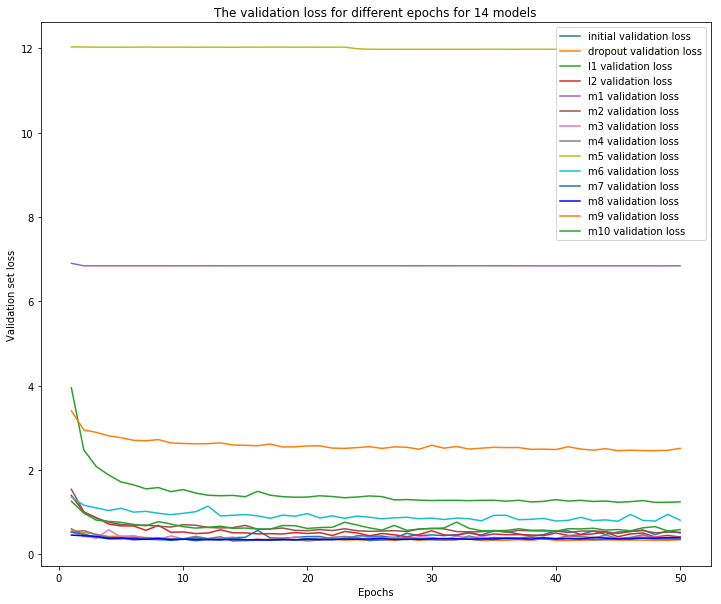

In [42]:
# Plot the validation set loss over the epochs for all 10 alternative models and the previous 4 models
m1_val_loss = result_m1.history['val_loss']
m2_val_loss = result_m2.history['val_loss']
m3_val_loss = result_m3.history['val_loss']
m4_val_loss = result_m4.history['val_loss']
m5_val_loss = result_m5.history['val_loss']
m6_val_loss = result_m6.history['val_loss']
m7_val_loss = result_m7.history['val_loss']
m8_val_loss = result_m8.history['val_loss']
m9_val_loss = result_m9.history['val_loss']
m10_val_loss = result_m10.history['val_loss']

# as some models only have 50 epoches, I only compare the results for the first 50 epoches for all models
new_epochs = np.arange(1, 51)
plt.figure(figsize=(12, 10))
plt.plot(new_epochs, init_val_loss[:50], label='initial validation loss')
plt.plot(new_epochs, drop_val_loss[:50], label='dropout validation loss')
plt.plot(new_epochs, l1_val_loss[:50], label='l1 validation loss')
plt.plot(new_epochs, l2_val_loss[:50], label='l2 validation loss')
plt.plot(new_epochs, m1_val_loss[:50], label='m1 validation loss')
plt.plot(new_epochs, m2_val_loss[:50], label='m2 validation loss')
plt.plot(new_epochs, m3_val_loss[:50], label='m3 validation loss')
plt.plot(new_epochs, m4_val_loss[:50], label='m4 validation loss')
plt.plot(new_epochs, m5_val_loss[:50], label='m5 validation loss')
plt.plot(new_epochs, m6_val_loss[:50], label='m6 validation loss')
plt.plot(new_epochs, m7_val_loss[:50], label='m7 validation loss')
plt.plot(new_epochs, m8_val_loss[:50], 'b', label='m8 validation loss')
plt.plot(new_epochs, m9_val_loss[:50], label='m9 validation loss')
plt.plot(new_epochs, m10_val_loss[:50], label='m10 validation loss')
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('The validation loss for different epochs for 14 models')
plt.show()

The best model from the ones I have estimated so far is model 8 (3 layer, 128 units, 128 batch size, 100 epochs, 0.9 dropout rate)- it has the lowest validation loss score at most epoches among all models.
<br>
<br>

In [46]:
# 4. Final model

# Reestimate that model using all of the training data (no validation set) with the same hyperparameter values
result_m8_reestimate = m8.fit(x_train, y_train, epochs=100, batch_size=128, verbose =0)

In [54]:
# training set mean validation loss
statistics.mean(m8_val_loss)

0.4433333766092062

In [55]:
# training set mean validation accuracy
m8_val_acc = result_m8.history['val_acc']
statistics.mean(m8_val_acc)

0.884209

In [48]:
# Calcuate the test set loss and accuracy
m8.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 42us/step


[0.6385451506495475, 0.8811]

The model generalizes quite well, as the training set mean accuracy rate is nearly the same as the test set accuracy, which is quite high (around 0.88). Besides, the gap between the mean loss rate of the training set and test set is not very large and might due to the fluctuation of model performance on different epoches. 
<br>
<br>
It might be that this model performed better than my other model configurations because the parameter conditions are not so complex (3 layer, 128 units, 128 batch size, 100 epochs, 0.9 dropout rate) and hence suitable for not complex data relations. Whether a model performs better or not highly depends on the situation of the data.